In [ ]:
# import pandas, numpy, scipy, math, matplotlib

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import scipy

In [4]:
from math import sqrt

In [6]:
import matplotlib.pyplot as plt

In [ ]:
#estimator

In [8]:
from sklearn.ensemble import RandomForestRegressor

In [7]:
from sklearn.linear_model import LinearRegression

In [9]:
from sklearn.svm import SVR

In [10]:
from sklearn import linear_model

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
from sklearn.tree import export_graphviz

In [ ]:
#model metrics

In [13]:
from sklearn.metrics import mean_squared_error

In [14]:
from sklearn.metrics import r2_score

In [15]:
from sklearn.model_selection import cross_val_score

In [ ]:
#cross validation

In [17]:
from sklearn.cross_validation import train_test_split

In [18]:
#data
rawData = pd.read_csv('Blackwell_Hist_Sample (1).csv', header=1)

In [19]:
rawData.head()

,ID,in.store,age,items,amount,region
0,1,0,60,8,2103.80,3
1,1,1,58,4,968.38,3
2,2,0,51,7,143.59,2
3,3,1,40,7,863.82,3
4,4,0,41,4,915.21,1


In [20]:
rawData

,ID,in.store,age,items,amount,region
0,1,0,60,8,2103.80,3
1,1,1,58,4,968.38,3
2,2,0,51,7,143.59,2
3,3,1,40,7,863.82,3
4,4,0,41,4,915.21,1
5,5,0,79,6,426.17,2
6,6,0,79,1,471.43,2
7,7,0,31,3,115.52,2
8,8,0,29,6,129.25,4
9,9,1,25,6,1025.90,1


In [21]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
ID          10000 non-null int64
in.store    10000 non-null int64
age         10000 non-null int64
items       10000 non-null int64
amount      10000 non-null float64
region      10000 non-null int64
dtypes: float64(1), int64(5)
memory usage: 468.8 KB


In [22]:
rawData.describe()

,ID,in.store,age,items,amount,region
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,4999.500100,0.455500,45.956500,4.50390,835.000181,2.659700
std,2886.895507,0.498041,15.902261,2.06611,723.099002,1.128904
min,1.000000,0.000000,18.000000,1.00000,5.230000,1.000000
25%,2499.750000,0.000000,33.000000,3.00000,276.752500,2.000000
50%,4999.500000,0.000000,45.000000,4.00000,570.665000,3.000000
75%,7499.250000,1.000000,57.000000,6.00000,1249.900000,4.000000
max,9999.000000,1.000000,85.000000,8.00000,2999.200000,4.000000


In [23]:
#features
features = rawData.iloc[:,0:6]
print('Summary of feature sample')
features.head()

Summary of feature sample


,ID,in.store,age,items,amount,region
0,1,0,60,8,2103.80,3
1,1,1,58,4,968.38,3
2,2,0,51,7,143.59,2
3,3,1,40,7,863.82,3
4,4,0,41,4,915.21,1


In [24]:
features.keys()

Index(['ID', 'in.store', 'age', 'items', 'amount', 'region'], dtype='object')

<Figure size 432x288 with 0 Axes>

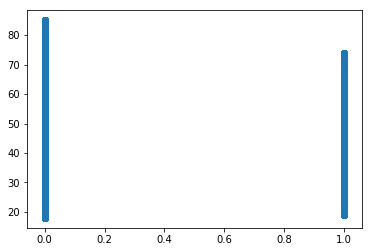

<Figure size 432x288 with 0 Axes>

In [25]:
from matplotlib import pyplot as plt
plt.scatter(rawData['in.store'],rawData["age"])
plt.figure()

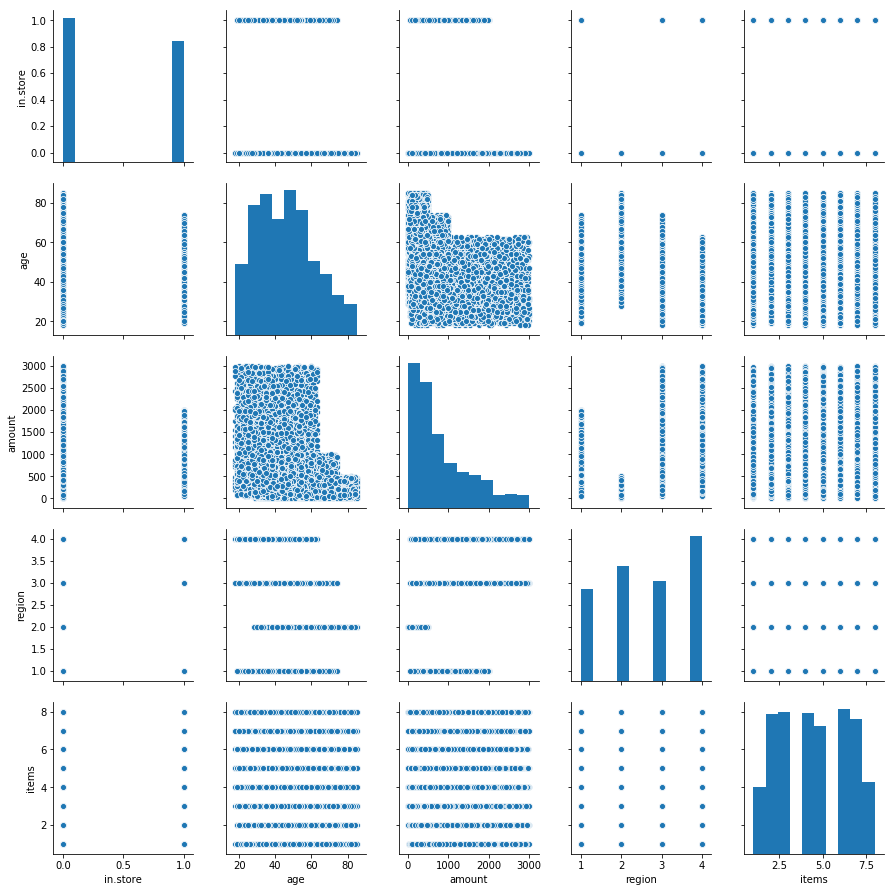

In [277]:
g = sns.pairplot(rawData, vars=["in.store", "age","amount","region","items"])

<Figure size 432x288 with 0 Axes>

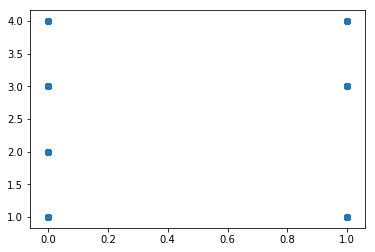

<Figure size 432x288 with 0 Axes>

In [26]:
from matplotlib import pyplot as plt
plt.scatter(rawData['in.store'],rawData["region"])
plt.figure()

<Figure size 432x288 with 0 Axes>

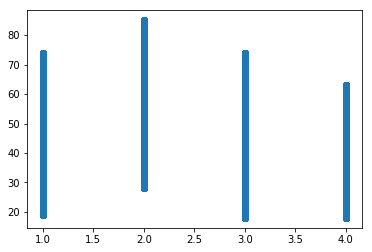

<Figure size 432x288 with 0 Axes>

In [28]:
from matplotlib import pyplot as plt
plt.scatter(rawData['region'],rawData["age"])
plt.figure()

<Figure size 432x288 with 0 Axes>

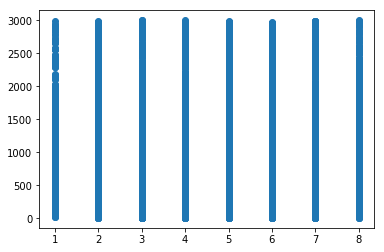

<Figure size 432x288 with 0 Axes>

In [30]:
from matplotlib import pyplot as plt
plt.scatter(rawData['items'],rawData["amount"])
plt.figure()

<Figure size 432x288 with 0 Axes>

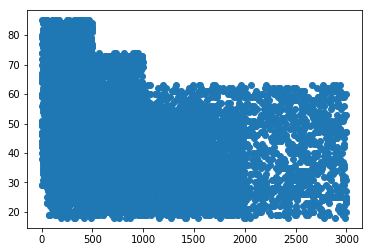

<Figure size 432x288 with 0 Axes>

In [31]:
from matplotlib import pyplot as plt
plt.scatter(rawData['amount'],rawData["age"])
plt.figure()

In [32]:
corrMat = rawData.corr()
print(corrMat)

                ID  in.store       age     items    amount    region
ID        1.000000 -0.010319  0.005661  0.006594 -0.001534 -0.015939
in.store -0.010319  1.000000 -0.175900 -0.012855 -0.062626 -0.005858
age       0.005661 -0.175900  1.000000  0.006183 -0.282937 -0.235322
items     0.006594 -0.012855  0.006183  1.000000 -0.001945 -0.014503
amount   -0.001534 -0.062626 -0.282937 -0.001945  1.000000  0.400907
region   -0.015939 -0.005858 -0.235322 -0.014503  0.400907  1.000000


C:\Users\nulvi\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


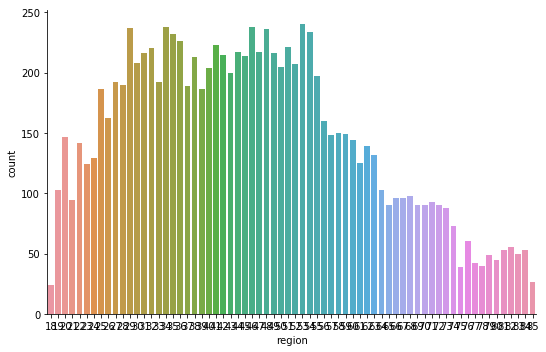

In [279]:
fg = sns.factorplot('age', data=rawData, kind='count', aspect=1.5)
fg.set_xlabels('region')

C:\Users\nulvi\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


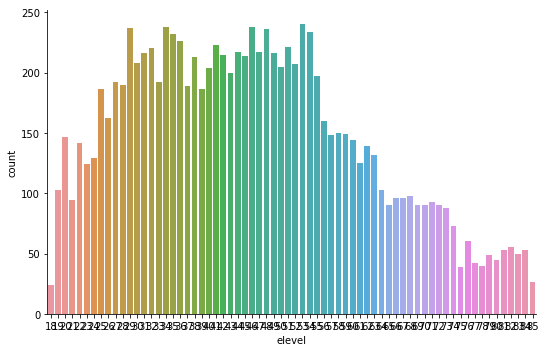

In [280]:
fg = sns.factorplot('age', data=rawData, kind='count', aspect=1.5)
fg.set_xlabels('elevel')

C:\Users\nulvi\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


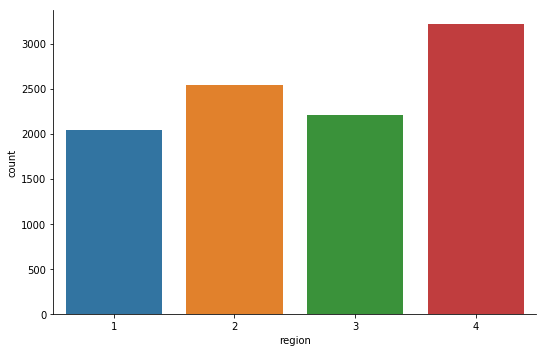

In [190]:
sns.factorplot('region', data=rawData, kind='count', aspect=1.5)

In [191]:
rawData.groupby(['region', 'age'])['amount'].count()

region  age
1       19      18
        20      33
        21      19
        22      32
        23      32
        24      31
        25      51
        26      39
        27      50
        28      47
        29      39
        30      36
        31      57
        32      51
        33      41
        34      58
        35      47
        36      51
        37      43
        38      50
        39      55
        40      45
        41      46
        42      43
        43      46
        44      38
        45      44
        46      54
        47      53
        48      65
              ... 
4       34      82
        35      88
        36      88
        37      59
        38      78
        39      66
        40      82
        41      64
        42      80
        43      74
        44      91
        45      83
        46      87
        47      76
        48      84
        49      81
        50      72
        51     104
        52      68
        53      94
        54      76


C:\Users\nulvi\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


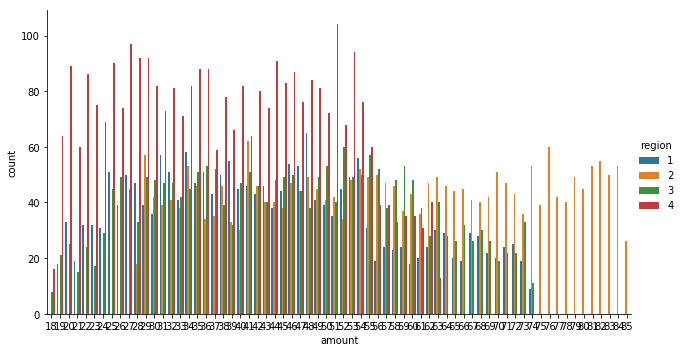

In [193]:
g = sns.factorplot('age', data=rawData, hue='region', kind='count', aspect=1.75)
g.set_xlabels('amount')

C:\Users\nulvi\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


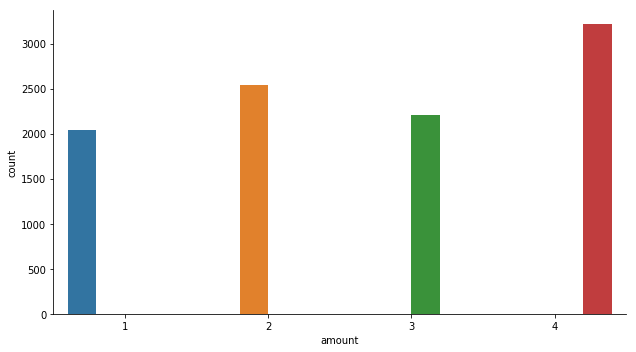

In [194]:
g = sns.factorplot('region', data=rawData, hue='region', kind='count', aspect=1.75)
g.set_xlabels('amount')

C:\Users\nulvi\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


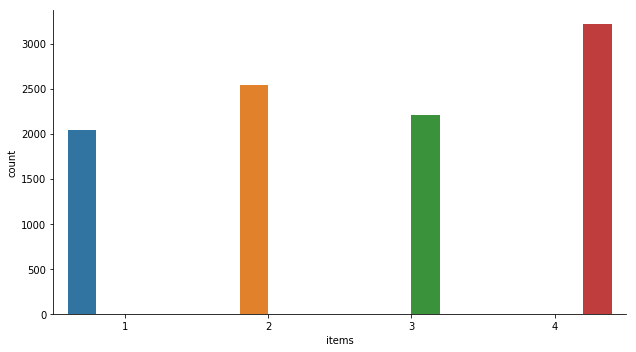

In [195]:
g = sns.factorplot('region', data=rawData, hue='region', kind='count', aspect=1.75)
g.set_xlabels('items')

C:\Users\nulvi\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


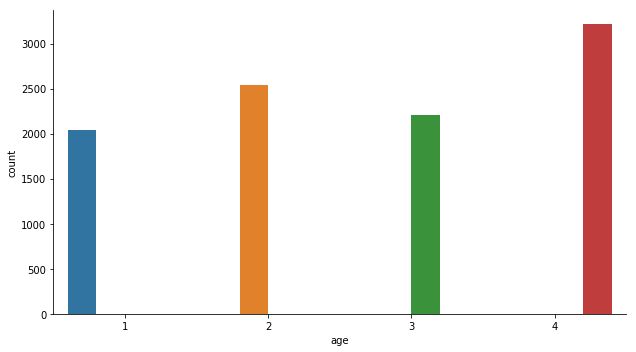

In [196]:
g = sns.factorplot('region', data=rawData, hue='region', kind='count', aspect=1.75)
g.set_xlabels('age')

C:\Users\nulvi\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


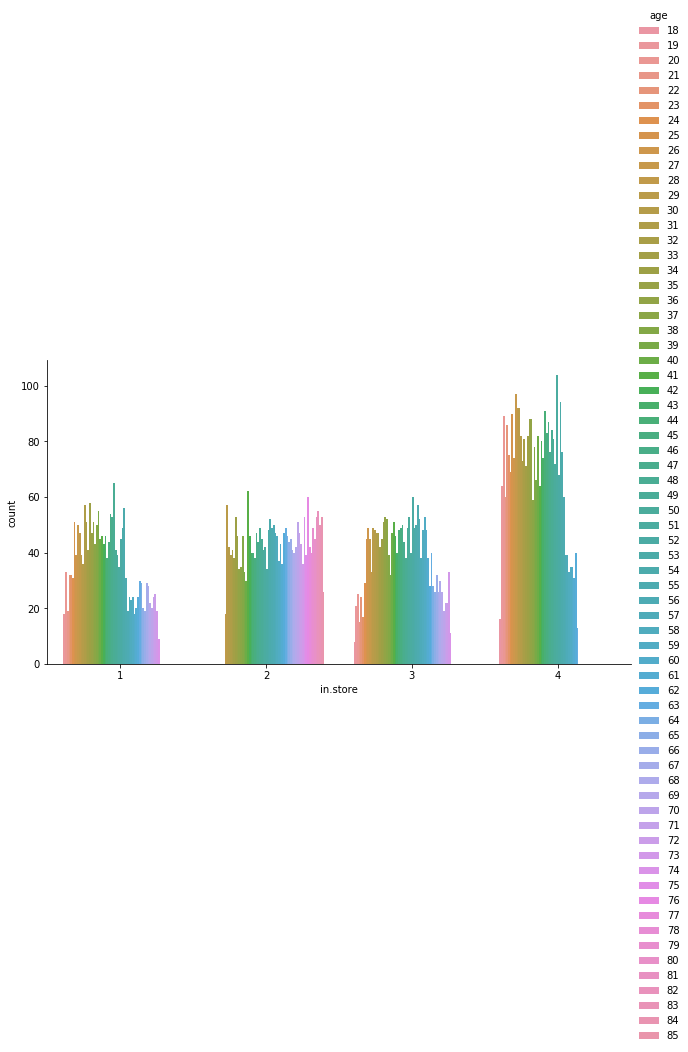

In [281]:
g = sns.factorplot('region', data=rawData, hue='age', kind='count', aspect=1.75)
g.set_xlabels('in.store')

In [40]:
#dependent variable
depVar = rawData['age']

In [41]:
#Training Set (Feature Space: X Training)
X_train = (features[: 1000])
X_train.head()

,ID,in.store,age,items,amount,region
0,1,0,60,8,2103.80,3
1,1,1,58,4,968.38,3
2,2,0,51,7,143.59,2
3,3,1,40,7,863.82,3
4,4,0,41,4,915.21,1


In [42]:
#Dependent Variable Training Set (y Training)
y_train = depVar[: 1000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 1000


0    60
1    58
2    51
3    40
4    41
Name: age, dtype: int64

In [43]:
X_test = features[-1000:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 1000
        ID  in.store  age  items   amount  region
9000  9000         0   25      1  2337.80       4
9001  9001         0   55      5   438.90       2
9002  9002         0   83      5   116.16       2
9003  9003         1   54      4  1287.80       1
9004  9004         1   30      4   380.72       4


In [44]:
#Ground Truth (y_test) 
y_test = depVar[-100:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 100


9900    53
9901    64
9902    43
9903    67
9904    38
Name: age, dtype: int64

In [45]:
from sklearn.cross_validation import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

In [48]:
x_train.shape, y_test.shape

NameError: name 'x_train' is not defined

In [49]:
model = LinearRegression (n_jobs = 10)

In [50]:
#Models
modelSVR = SVR()
modelRF = RandomForestRegressor()
modelLR = LinearRegression()
modelDT = DecisionTreeClassifier()

In [51]:
#features 
features = rawData.iloc [:, 0:6] 
print ('Resumen de muestra de características') 
features.head ()

Resumen de muestra de características


,ID,in.store,age,items,amount,region
0,1,0,60,8,2103.80,3
1,1,1,58,4,968.38,3
2,2,0,51,7,143.59,2
3,3,1,40,7,863.82,3
4,4,0,41,4,915.21,1


In [54]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=10, normalize=False)

In [55]:
modelRF.fit(y_train,y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[54. 66. 54. 59. 45. 63. 39. 70. 59. 33. 34. 59. 57. 30. 51. 51. 42. 31.
 57. 46. 49. 60. 55. 67. 74. 26. 49. 76. 74. 43. 58. 56. 41. 41. 31. 54.
 58. 32. 27. 82. 55. 22. 39. 47. 31. 21. 51. 39. 68. 33. 82. 50. 68. 38.
 44. 64. 33. 21. 23. 40. 77. 42. 70. 82. 47. 51. 33. 31. 25. 81. 69. 73.
 49. 58. 45. 30. 51. 25. 71. 70. 19. 34. 47. 44. 73. 43. 57. 46. 47. 29.
 38. 65. 34. 21. 69. 44. 49. 65. 83. 53. 41. 23. 26. 63. 19. 43. 47. 63.
 29. 36. 44. 84. 60. 30. 25. 43. 63. 41. 57. 24. 42. 37. 20. 33. 82. 57.
 32. 19. 68. 27. 71. 57. 48. 61. 43. 49. 34. 57. 49. 58. 63. 29. 37. 48.
 21. 57. 63. 21. 44. 24. 52. 49. 54. 35. 61. 37. 41. 73. 62. 25. 55. 43.
 47. 29. 41. 73. 53. 45. 25. 58. 46. 63. 37. 70. 42. 34. 57. 46. 49. 34.
 25. 69. 75. 20. 68. 48. 47. 71. 50. 44. 42. 25. 58. 51. 56. 46. 47. 53.
 27. 82. 72. 47. 27. 37. 37. 56. 53. 73. 51. 29. 57. 45. 49. 47. 55. 70.
 29. 43. 25. 62. 51. 34. 51. 49. 29. 39. 61. 68. 40. 67. 25. 43. 56. 35.
 30. 47. 53. 19. 74. 73. 51. 53. 36. 31. 52. 37. 73. 54. 40. 53. 29. 48.
 41. 40. 47. 27. 51. 38. 76. 77. 36. 51. 41. 25. 25. 38. 70. 43. 32. 19.
 52. 50. 35. 27. 75. 24. 73. 66. 36. 36. 55. 79. 34. 49. 57. 20. 47. 61.
 65. 42. 42. 36. 58. 51. 25. 73. 61. 32. 58. 25. 25. 53. 40. 29. 65. 50.
 47. 44. 52. 53. 25. 55. 19. 71. 43. 62. 50. 57. 53. 52. 27. 53. 47. 20.
 23. 53. 46. 37. 36. 39. 35. 59. 40. 44. 28. 51. 46. 69. 34. 70. 45. 60.
 34. 41. 54. 63. 32. 60. 29. 20. 64. 20. 81. 20. 19. 20. 38. 46. 35. 28.
 53. 29. 34. 34. 39. 37. 69. 38. 64. 31. 51. 35. 35. 39. 32. 69. 67. 35.
 46. 74. 36. 52. 46. 33. 37. 25. 39. 56. 67. 74. 40. 48. 37. 27. 71. 50.
 24. 40. 41. 24. 22. 22. 70. 20. 44. 28. 49. 49. 72. 26. 26. 34. 22. 57.
 72. 30. 44. 61. 29. 37. 44. 26. 22. 43. 56. 32. 21. 55. 46. 61. 67. 54.
 26. 78. 53. 43. 19. 25. 74. 40. 30. 66. 27. 43. 29. 41. 33. 24. 28. 37.
 24. 50. 21. 63. 50. 34. 29. 69. 64. 63. 73. 25. 38. 55. 23. 33. 72. 22.
 22. 63. 27. 41. 31. 47. 56. 30. 28. 29. 28. 36. 45. 21. 33. 31. 51. 26.
 57. 28. 48. 28. 47. 22. 27. 63. 57. 35. 36. 53. 50. 23. 64. 30. 24. 50.
 35. 43. 50. 38. 48. 27. 35. 47. 31. 32. 38. 39. 18. 73. 41. 36. 37. 62.
 37. 31. 40. 64. 34. 33. 59. 32. 28. 28. 29. 43. 60. 57. 23. 56. 57. 54.
 46. 24. 74. 38. 39. 33. 29. 47. 47. 46. 40. 32. 34. 61. 21. 28. 46. 68.
 28. 34. 33. 34.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [56]:
modelRF.score(x_test,y_test)

NameError: name 'x_test' is not defined

In [57]:
modelSVR.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [58]:
modelSVR.score(X_test,y_test)

-0.03561051392270076

In [59]:
modelLR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
#Model Fitting 
modelRF.fit (X_train, y_train) 
print (cross_val_score (modelRF, X_train, y_train)) 
modelRF.score (X_train, y_train)

[0.99886123 0.99990283 0.99989303]


0.9999862753962776

In [61]:
modelSVR.fit (X_train, y_train) 
print (cross_val_score (modelSVR, X_train, y_train)) 
modelSVR.score (X_train, y_train)

[-0.15576654 -0.01738595 -0.09873242]


0.09598371697950292

In [305]:
modelLR.fit (X_train, y_train) 
print (cross_val_score (modelLR, X_train, y_train)) 
modelLR.score (X_train, y_train)

[1. 1. 1.]


1.0

In [62]:
modelDT.fit (X_train, y_train) 
print (cross_val_score (modelLR, X_train, y_train)) 
modelDT.score (X_train, y_train)

[1. 1. 1.]


1.0

In [63]:
predicciones = modelRF.predict (X_test)

In [64]:
rmse = sqrt (mean_squared_error (y_test, predicciones))

In [65]:
predRsquared = r2_score (y_test, predicciones)

In [311]:
#Make Predictions
predictions = modelRF.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 1.000
RMSE: 0.095
